In [1]:
import numpy as np

In [4]:
%cd "ERA_wind"

c:\Users\17735\Desktop\CAIS++\Wind_downscaling\ERA_wind


C:\Users\17735\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
t = np.load('ERA_wind.npz')

In [6]:
list(t.keys())

['lat', 'lon', 'level', 'time', 'rel_hum', 'temp', 'wind_u', 'wind_v']

In [7]:
print(t)

NpzFile 'ERA_wind.npz' with keys: lat, lon, level, time, rel_hum...


In [8]:
# dir(t)

In [9]:
t.files

['lat', 'lon', 'level', 'time', 'rel_hum', 'temp', 'wind_u', 'wind_v']

In [10]:
for k in t.keys():
    print (k)
    # print(t.get(k)) # same as t[k]


lat
lon
level
time
rel_hum
temp
wind_u
wind_v


In [11]:
t.get('lat').keys()

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [12]:
print(type(t.get('lat')[0]))

<class 'numpy.float32'>


In [13]:
!pip install cartopy

  Obtaining dependency information for cartopy from https://files.pythonhosted.org/packages/bb/50/ab5495dcc22587179134cd37e6534212babeda78e86bda311c37c773f086/Cartopy-0.22.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=1.7 from https://files.pythonhosted.org/packages/29/cd/763817c27e6cb6d04ffd477a5dcdfdd71bc3fb640f5748c9f2c1cd08ba52/shapely-2.0.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyshp>=2.1 from https://files.pythonhosted.org/packages/98/2f/68116db5b36b895c0450e3072b8cb6c2fac0359279b182ea97014d3c8ac0/pyshp-2.3.1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ---------------------------------------- 56.0/56.0 kB 1.5 MB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.1.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
   ------

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# cartesian product to plot every lat x lon pair
lat = t.get('lat')  
lon = t.get('lon')  
x_grid, y_grid = np.meshgrid(lon, lat, indexing='xy')
x_values = x_grid.flatten()
y_values = y_grid.flatten()

c:\Users\17735\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


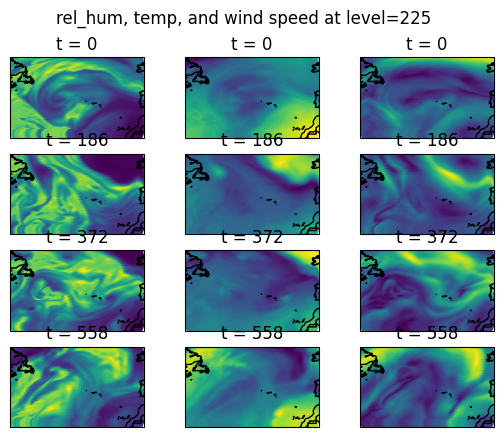

In [15]:
fig, axs = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('rel_hum, temp, and wind speed at level=225')

# rel_hum


for r in range(4):
    values = t.get('rel_hum')[int(744*r/4)][1]
    values_flat = values.flatten()
    
    scatter_plot = axs[r,0].scatter(x_values, y_values, c=values_flat, cmap='viridis', s=50, transform=ccrs.PlateCarree())
    axs[r,0].coastlines()
    axs[r,0].add_feature(cfeature.BORDERS)
    axs[r,0].set_title("t = {}".format(int(744*r/4)))



# temp


for r in range(4):
    values = t.get('temp')[int(744*r/4)][1]
    values_flat = values.flatten()
    
    scatter_plot = axs[r,1].scatter(x_values, y_values, c=values_flat, cmap='viridis', s=50, transform=ccrs.PlateCarree())
    axs[r,1].coastlines()
    axs[r,1].add_feature(cfeature.BORDERS)
    axs[r,1].set_title("t = {}".format(int(744*r/4)))
    
# wind speed

min_value = float('inf')
max_value = float('-inf')

for r in range(4):
    u = t.get('wind_u')[int(744*r/4)][1]
    v = t.get('wind_v')[int(744*r/4)][1]
    wind_speed = np.sqrt(u**2 + v**2)
    wind_speed_flat = wind_speed.flatten()
    
    
    scatter_plot = axs[r,2].scatter(x_values, y_values, c=wind_speed_flat, cmap='viridis', s=50, transform=ccrs.PlateCarree())
    axs[r,2].coastlines()
    axs[r,2].add_feature(cfeature.BORDERS)
    axs[r,2].set_title("t = {}".format(int(744*r/4)))
    

plt.show()

In [16]:
# 744 x 4 x 121 x 201 (time x pressure level x latitude x longitude)
# for i in range(121):
#     for j in range(201):
#         print(i,j)
#         triplet_list.append((t.get('lat'), t.get('lon'), (t.get('rel_hum')[0][1][i][j])))

In [17]:
# dictionary of arrays
# pick one "level" and move forward (PRESSURE LEVEL)


# gregorian date to calendar datetime
# splitting data into train, validation, and test
# temperature and wind speed 
# plot on a 2d map projection
    # final two dimensions of wind data will help for mapping 
# plot histograms (pick a few grid points) and visualize where the region actually is (box above the atlantic)
    # take a couple of points in the grid and compare over time
    # distributions of what the wind looks like (scalar wind) 
# zhang -- specific parameterization of wind speed 
# compare over water and over land
# differences when the sun rises and sets 

# range of wind speeds and how it changes over the area --> normalizing (outliers)
    # visualizing 
# daytime vs nighttime 
    # July 1 at 12:15AM at Greenwich time 

# cosine of the solar zenith angle 
# wind speeds more complex during the daytime 

# day vs. night
# water vs. land



In [18]:
u = t.get('wind_u')
v = t.get('wind_v')

In [19]:
lon[20]

-55.0

In [20]:
wind_speeds = [np.sqrt((u[i][2][20][20])**2 + (v[i][2][20][20])**2) for i in range (744)]

Text(0, 0.5, 'Frequency')

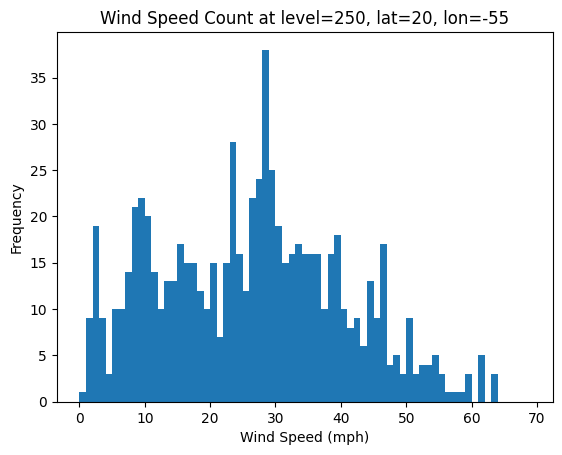

In [21]:
plt.hist(wind_speeds, bins=range(70))
plt.title("Wind Speed Count at level=250, lat=20, lon=-55")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Frequency")